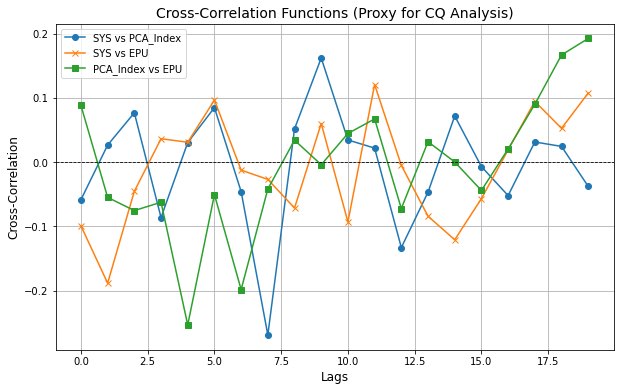

In [ ]:
# Load the dataset to start CQ analysis
import pandas as pd
from statsmodels.tsa.stattools import acf
from sklearn.utils import resample
import numpy as np
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf
file_path = r'C:\Users\adity\Downloads\Stationary_Data_updated1.xlsx'

#file_path = '/mnt/data/Stationary_Data_updated.xlsx'
excel_data = pd.ExcelFile(file_path)
# Display the sheet names to understand the structure of the file
excel_data.sheet_names
# Load the data from the identified sheet to inspect the content
data = pd.read_excel(file_path, sheet_name='Sheet1')
# Display the first few rows of the dataset to understand its structure
data.head()

# Drop rows with NaN values for analysis
data_cleaned = data.dropna(subset=['SYS_stationary', 'PCA_Index_diff', 'EPU_stationary'])
# Extract the three series for CQ analysis
series_1 = data_cleaned['SYS_stationary']
series_2 = data_cleaned['PCA_Index_diff']
series_3 = data_cleaned['EPU_stationary']
# Compute cross-correlations (as a proxy for CQ visualization)
lags = 20
ccf_12 = ccf(series_1, series_2)[:lags]
ccf_13 = ccf(series_1, series_3)[:lags]
ccf_23 = ccf(series_2, series_3)[:lags]
# Prepare lags for plotting
lags_array = np.arange(lags)
# Plot cross-correlation results
plt.figure(figsize=(10, 6))
plt.plot(lags_array, ccf_12, marker='o', label='SYS vs MS')
plt.plot(lags_array, ccf_13, marker='x', label='SYS vs EPU')
plt.plot(lags_array, ccf_23, marker='s', label='MS vs EPU')
plt.title('Cross-Correlation Functions (Proxy for CQ Analysis)', fontsize=14)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Cross-Correlation', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()
plt.show()
